# Add text overlays to videos

Burn text, captions, or watermarks directly into video files.

## Problem

You need to add text to videos—captions, watermarks, titles, or dynamic labels. Manual video editing doesn't scale for batch processing.

| Use case | Text type | Position |
|----------|-----------|----------|
| Branding | Logo/company name | Corner |
| Captions | Subtitles | Bottom center |
| Titles | Video title | Top or center |
| Labels | Dynamic info | Any position |

## Solution

**What's in this recipe:**

- Add simple text overlays
- Create styled captions with backgrounds
- Position text with alignment options
- Crop a rectangular region from a video

Use `video.overlay_text()` to burn text into videos with full control over styling and position, and `video.crop()` to extract a rectangular region.

### Setup

In [ ]:
%pip install -qU pixeltable

In [2]:
import pixeltable as pxt

In [3]:
# Create a fresh directory
pxt.drop_dir('overlay_demo', force=True)
pxt.create_dir('overlay_demo')

Connected to Pixeltable database at: postgresql+psycopg://postgres:@/pixeltable?host=/Users/pjlb/.pixeltable/pgdata
Created directory 'overlay_demo'.


/opt/miniconda3/envs/pixeltable/lib/python3.11/site-packages/pixeltable/env.py:494: UserWarning: Progress reporting is disabled because ipywidgets is not installed. To fix this, run: `pip install ipywidgets`
  warnings.warn(


### Load sample videos

In [4]:
# Create a video table
videos = pxt.create_table(
    'overlay_demo/videos', {'video': pxt.Video, 'title': pxt.String}
)

# Insert a sample video
videos.insert(
    [
        {
            'video': 's3://multimedia-commons/data/videos/mp4/ffe/ffb/ffeffbef41bbc269810b2a1a888de.mp4',
            'title': 'Sample Video',
        }
    ]
)

Created table 'videos'.
Inserted 1 row with 0 errors in 3.21 s (0.31 rows/s)


1 row inserted.

### Add a simple text overlay

In [5]:
# Add a simple watermark in the corner
videos.add_computed_column(
    watermarked=videos.video.overlay_text(
        'My Brand',
        font_size=24,
        color='white',
        opacity=0.7,
        horizontal_align='right',
        horizontal_margin=20,
        vertical_align='top',
        vertical_margin=20,
    )
)

Added 1 column value with 0 errors in 1.25 s (0.80 rows/s)


1 row updated.

### Add YouTube-style captions

In [6]:
# Add a caption with a semi-transparent background box
videos.add_computed_column(
    captioned=videos.video.overlay_text(
        'This is a sample caption',
        font_size=32,
        color='white',
        box=True,  # Add background box
        box_color='black',
        box_opacity=0.8,
        box_border=[6, 14],  # Padding: [top/bottom, left/right]
        horizontal_align='center',
        vertical_align='bottom',
        vertical_margin=70,  # Distance from bottom
    )
)

Added 1 column value with 0 errors in 1.08 s (0.92 rows/s)


1 row updated.

### Add dynamic titles from table columns

In [7]:
# Add video title as an overlay (dynamic per video)
videos.add_computed_column(
    titled=videos.video.overlay_text(
        videos.title,  # Use the title column!
        font_size=48,
        color='yellow',
        opacity=1.0,
        horizontal_align='center',
        vertical_align='top',
        vertical_margin=30,
    )
)

Added 1 column value with 0 errors in 1.15 s (0.87 rows/s)


1 row updated.

title,video,watermarked,captioned,titled
Sample Video,,,,

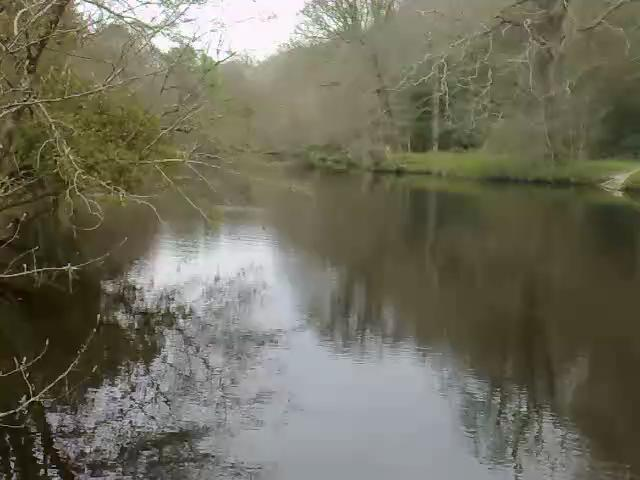
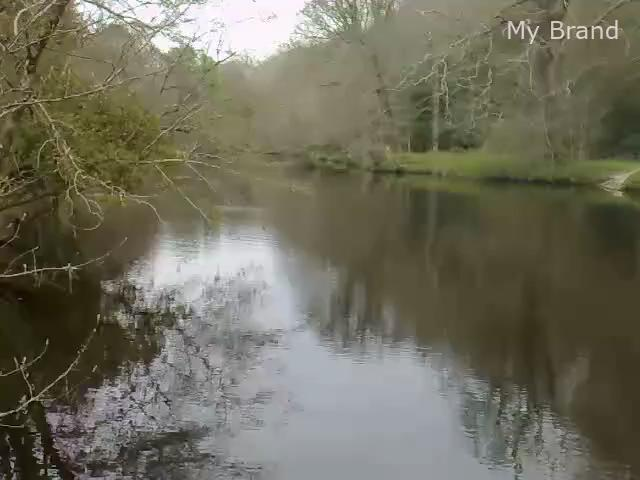
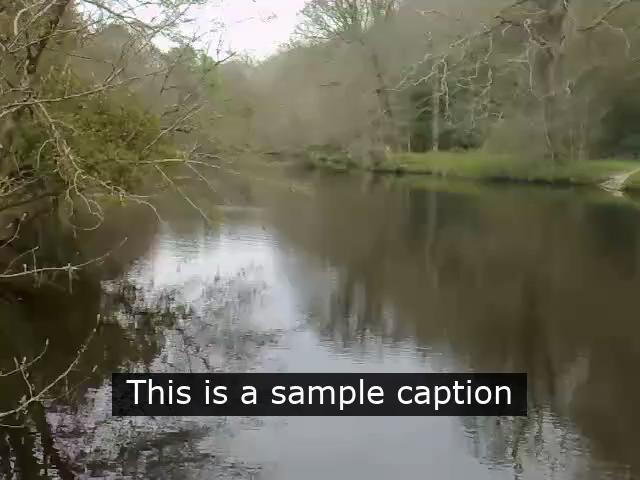
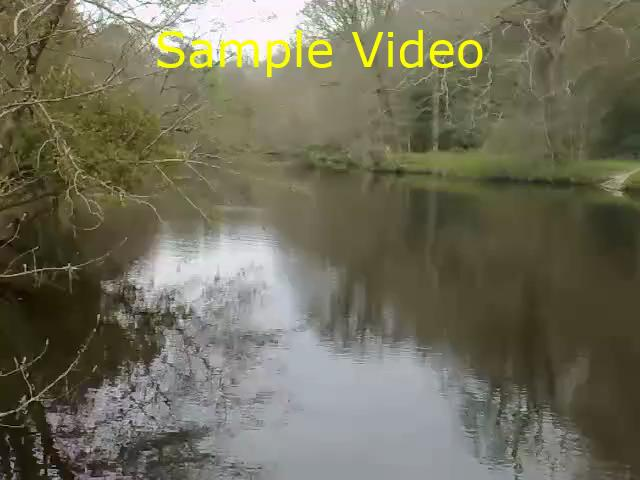

In [8]:
# View all versions
videos.select(
    videos.title,
    videos.video,
    videos.watermarked,
    videos.captioned,
    videos.titled,
).collect()

### Crop a region from a video

Use `video.crop()` to extract a rectangular region from a video. This is useful for focusing on a specific area of interest, removing borders, or preparing clips for object-specific analysis.

In [9]:
# Crop using xywh format (default): [x, y, width, height]
videos.add_computed_column(cropped=videos.video.crop([100, 50, 320, 240]))

# Crop using xyxy format (common in object detection pipelines):
# videos.add_computed_column(
#     cropped_xyxy=videos.video.crop([100, 50, 420, 290], bbox_format='xyxy')
# )

Added 1 column value with 0 errors in 0.56 s (1.78 rows/s)


1 row updated.

## Explanation

**Positioning options:**

| Parameter | Values | Description |
|-----------|--------|-------------|
| `horizontal_align` | `'left'`, `'center'`, `'right'` | Horizontal position |
| `vertical_align` | `'top'`, `'center'`, `'bottom'` | Vertical position |
| `horizontal_margin` | pixels | Distance from edge |
| `vertical_margin` | pixels | Distance from edge |

**Styling options:**

| Parameter | Type | Description |
|-----------|------|-------------|
| `font_size` | int | Text size in points |
| `color` | str | Text color (`'white'`, `'#FF0000'`) |
| `opacity` | float | 0.0 (transparent) to 1.0 (opaque) |
| `font` | str | Font family or path to .ttf file |

**Background box options:**

| Parameter | Type | Description |
|-----------|------|-------------|
| `box` | bool | Enable background box |
| `box_color` | str | Box color |
| `box_opacity` | float | Box transparency |
| `box_border` | list | Padding `[all]`, `[v, h]`, or `[t, r, b, l]` |

**Requirements:**

- FFmpeg must be installed and in PATH

## See also

- [Generate thumbnails](https://docs.pixeltable.com/howto/cookbooks/video/video-generate-thumbnails) - Create preview images
- [Detect scene changes](https://docs.pixeltable.com/howto/cookbooks/video/video-scene-detection) - Find cuts and transitions